In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [25]:
# import miscellaneous tools
import numpy as np
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# import data sets
from tadasets import dsphere
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

# import Ripser
from ripser import ripser
from persim import plot_diagrams

# import PyLandscapes and nessasary functions
from PersistenceLandscapeGrid import PersistenceLandscapeGrid, snap_PL, average_grid
from PersistenceLandscapeExact import PersistenceLandscapeExact
from auxiliary import linear_combination
from visualization import plot_landscape

## Basic Usage

Load wine data set. 

Wine data has 3 classes and [59,71,48] samples per class. It has 178 samples total and 13 dimensions.

Load breast cancer data set. 

Breast cancer has 2 classes with 212(M) and 357(B) per class. It has 569 samples total and 30 dimensions. 

In [26]:
wine_data, wine_target = load_wine(return_X_y=True)
bc_data, bc_target = load_breast_cancer(return_X_y=True)

#### Standardize features and compute persistence diagrams. 

In [27]:
wine_data, wine_target = load_wine(return_X_y=True)
bc_data, bc_target = load_breast_cancer(return_X_y=True)

scaler = StandardScaler()
wine_data_scl = scaler.fit_transform(wine_data)
bc_data_scl = scaler.fit_transform(bc_data)

wine_dgms = ripser(wine_data_scl)['dgms']
bc_dgms = ripser(bc_data_scl)['dgms']

####  Plot persistence diagrams.

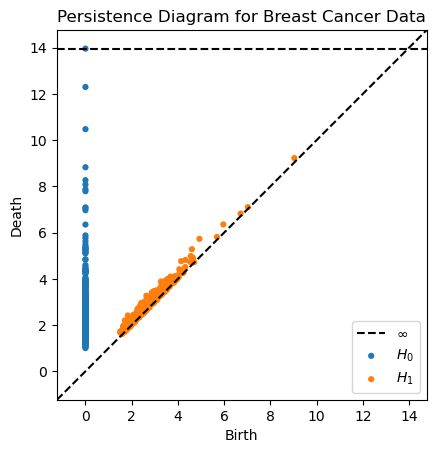

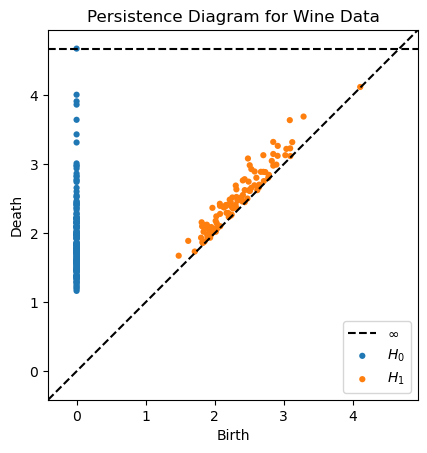

In [23]:
plot_diagrams(bc_dgms, show = True, title = 'Persistence Diagram for Breast Cancer Data')
plot_diagrams(wine_dgms, show = True, title = 'Persistence Diagram for Wine Data')

### Compute Persistence Landscapes.

#### Instantiate class.

In [28]:
wine_pl = PersistenceLandscapeExact(hom_deg = 1, dgms = wine_dgms)
bc_pl = PersistenceLandscapeExact(hom_deg = 1, dgms = bc_dgms)

#### Compute Landscape.

In [29]:
wine_pl.compute_landscape()
bc_pl.compute_landscape()

#### Critical values are stored in an attribute.

In [30]:
wine_pl.critical_pairs[0]

[[1.4780925512313843, 0],
 [1.575572431087494, 0.09747987985610962],
 [1.644545555114746, 0.028506755828857422],
 [1.7519147396087646, 0.13587594032287598],
 [1.8447573781013489, 0.04303330183029175],
 [1.8677599430084229, 0.06603586673736572],
 [1.871985375881195, 0.061810433864593506],
 [1.9833743572235107, 0.17319941520690918],
 [2.061516225337982, 0.09505754709243774],
 [2.166257917881012, 0.19979923963546753],
 [2.219876527786255, 0.1461806297302246],
 [2.2493131160736084, 0.17561721801757812],
 [2.3207350969314575, 0.104195237159729],
 [2.350682020187378, 0.13414216041564941],
 [2.369873881340027, 0.11495029926300049],
 [2.385555148124695, 0.13063156604766846],
 [2.4101964235305786, 0.10599029064178467],
 [2.4963929653167725, 0.19218683242797852],
 [2.5474809408187866, 0.14109885692596436],
 [2.584628462791443, 0.1782463788986206],
 [2.5977511405944824, 0.16512370109558105],
 [2.606592297554016, 0.17396485805511475],
 [2.630504846572876, 0.15005230903625488],
 [2.7803224325180054

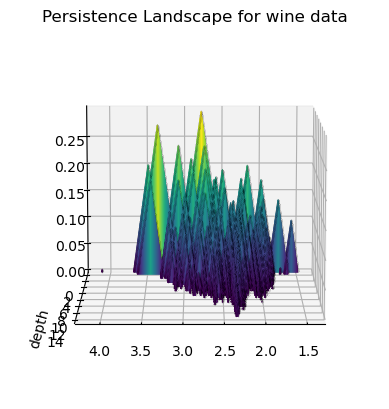

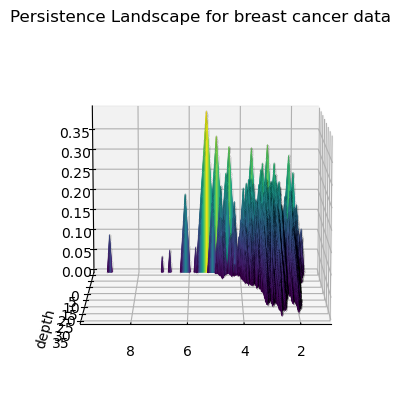

In [10]:
plot_landscape(wine_pl, title = 'Persistence Landscape for wine data')
plot_landscape(bc_pl, title = 'Persistence Landscape for breast cancer data')

#### Find the difference of the two landscapes.

In [31]:
diff_pl = wine_pl - bc_pl

#### The difference of landscapes is a landscape.

In [32]:
diff_pl

The persistence landscape of diagrams in homological degree 1

#### Plot the difference.

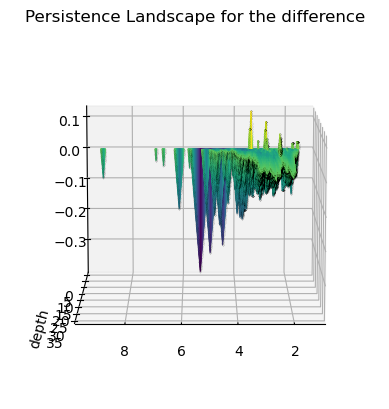

In [17]:
plot_landscape(diff_pl, title = 'Persistence Landscape for the difference')

#### Assign difference a numerical value by taking the sup norm.

In [33]:
diff = diff_pl.sup_norm()
print(f'The sup norm of the difference landscape is {diff}.')

The sup norm of the difference landscape is 0.3988025188446045.


## Experiemnt: $S^2$ vs. $S^3$ 

### This notebook executes an experiment to see if persistence landscapes in homological degree 1 and 2 can tell the difference between a sphere in dimension 2 and 3.

#### Sample 100 points from $S^2$ and $S^3$, 100 times and normalize

In [34]:
# sph2: list of 100 runs of sampling S2
sph2 = []
for i in range(100):
    sph2.append( preprocessing.scale(dsphere(n=100, d=2, r=1)) ) #preprocessing.scale to scale samples

# sph3: list of 100 runs of sampling S3
sph3 = []
for i in range(100):
    sph3.append( preprocessing.scale(dsphere(n=100, d=3, r=1)) )

#### Compute persistence `diagram` for $S^2$ and $S^3$ using `Ripser`.

In [35]:
start_rips = timer()

#sph2_dgm: list of 100 diagrams for 100 sampled points on S2
sph2_dgm = [ripser(sphere, maxdim=2)['dgms'] for sphere in sph2]


#sph3_dgm: list of 100 diagrams for 100 sampled points on S3
sph3_dgm = [ripser(sphere, maxdim=2)['dgms']for sphere in sph3]

stop_rips = timer()
print(f'Ripser took {stop_rips-start_rips} seconds.')

Ripser took 51.61460102700039 seconds.


#### Compute persistence ` landscape` for $S^2$ and $S^3$ using `PyLandscapes`.

In [36]:
start_grid = timer()

#sph2_PL1, sph2_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
sph2_PL1 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=1, compute=True) for diagram in sph2_dgm];
sph2_PL2 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=2, compute=True) for diagram in sph2_dgm];

#sph3_PL1, sph3_PL2: list of 100 landscapes for 100 sampled points on S3 in degree 1 and 2 
sph3_PL1 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=1, compute=True) for diagram in sph3_dgm];
sph3_PL2 = [PersistenceLandscapeGrid(dgms=diagram , hom_deg=2, compute=True) for diagram in sph3_dgm];

stop_grid = timer()
print(f'PersistenceLandscapeGrid took {stop_grid-start_grid} seconds.')

PersistenceLandscapeGrid took 2.3073947670000052 seconds.


#### Average the 100 landscapes for $S^2$ and $S^3$ in dimension 1 and 2.

In [37]:
#avg2_hom1, avg2_hom2: average landscape for the 100 samples of S2 in degree 1 and 2 
avg2_hom1 = average_grid(sph2_PL1)
avg2_hom2 = average_grid(sph2_PL2)

#avg3_hom1, avg3_hom2: average landscape for the 100 samples of S3 in degree 1 and 2 
avg3_hom1 = average_grid(sph3_PL1)
avg3_hom2 = average_grid(sph3_PL2)

#### Compute the difference between the average landscape of $S^2$ and $S^3$ in dimension 1 and 2.

Snap to the same grid. 

In [38]:
avg2_hom1

The persistence landscapes of diagrams in homological degree 1 on grid from 0.14384940266609192 to 1.755579948425293 with step size 500

In [39]:
avg3_hom1

The persistence landscapes of diagrams in homological degree 1 on grid from 0.41810834407806396 to 2.293280839920044 with step size 500

In [40]:
avg2_hom1_snap, avg3_hom1_snap = snap_PL([avg2_hom1, avg3_hom1])
avg2_hom2_snap, avg3_hom2_snap = snap_PL([avg2_hom2, avg3_hom2])

avg2_hom1_snap

The persistence landscapes of diagrams in homological degree 1 on grid from 0.14384940266609192 to 2.293280839920044 with step size 500

In [41]:
#diff_hom1, diff_hom2: difference between average landscapes in degree 1 and 2 of S2 and S3
true_diff_hom1_pl = (avg2_hom1_snap - avg3_hom1_snap)
true_diff_hom1 = true_diff_hom1_pl.sup_norm()

true_diff_hom2_pl = (avg2_hom2_snap - avg3_hom2_snap)
true_diff_hom2 = true_diff_hom2_pl.sup_norm()

#### Plot average landscape in degree 1 for S2 and S3 and difference between them.

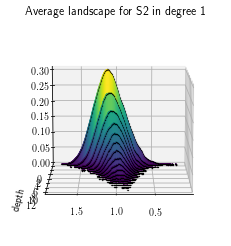

In [23]:
# plot avg S^2
plot_landscape(avg2_hom1_snap, title = 'Average landscape for S2 in degree 1') 

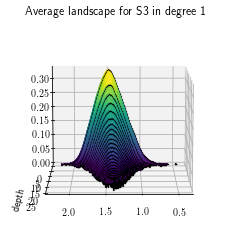

In [19]:
# plot avg S^3
plot_landscape(avg3_hom1_snap, title = 'Average landscape for S3 in degree 1') 

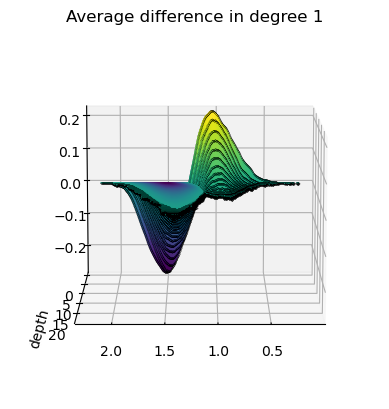

In [26]:
# plot diff
plot_landscape(true_diff_hom1_pl, title = 'Average difference in degree 1')

### Run permutation test for homological degree 1.

In [42]:
#PL1: persistence landscapes in degree 1 from S2 and S3
PL1 = []
PL1.extend(sph2_PL1)
PL1.extend(sph3_PL1)
PL1 = np.array(PL1) #cast as array in order to index with a list
more_extreme = 0
checked = 0

for run in range(100):
    # shuffle labels for 200 landscapes
    A_indices = random.sample(range(100), 50)
    B_indices = [_ for _ in range(100) if _ not in A_indices]
    A_PL1 = PL1[A_indices]
    B_PL1 = PL1[B_indices]
    
    # take average of landscape with label A and label B resp.
    avg_A_PL1 = average_grid(A_PL1)
    avg_B_PL1 = average_grid(B_PL1)
    
    avg_A_PL1_snap, avg_B_PL1_snap = snap_PL([avg_A_PL1, avg_B_PL1])
    shuffled_diff_hom1 = (avg_A_PL1_snap - avg_B_PL1_snap).sup_norm() #compute shuffled diff
    checked += 1
    
    # count differences more extreme than true diff
    if np.abs(shuffled_diff_hom1) > np.abs(true_diff_hom1):
        more_extreme += 1
        
print(f'Checked {checked} relabled landscapes.')
print(f'{more_extreme} of the relabeled persistence landscapes'
      ' had difference more extreme than the true differnce.')

Checked 100 relabled landscapes.
0 of the relabeled persistence landscapes had difference more extreme than the true differnce.


### Run permutation test for homological degree 2.

In [43]:
#PL1: persistence landscapes in degree 1 from S2 and S3
PL2 = []
PL2.extend(sph2_PL2)
PL2.extend(sph3_PL2)
PL2 = np.array(PL2) #cast as array in order to index with a list
more_extreme = 0
checked = 0

for run in range(100):
    # shuffle labels for 200 landscapes
    A_indices = random.sample(range(100), 50)
    B_indices = [_ for _ in range(100) if _ not in A_indices]
    A_PL2 = PL2[A_indices]
    B_PL2 = PL2[B_indices]
    
    # take average of landscape with label A and label B resp.
    avg_A_PL2 = average_grid(A_PL2)
    avg_B_PL2 = average_grid(B_PL2)

    avg_A_PL2_snap, avg_B_PL2_snap = snap_PL([avg_A_PL2, avg_B_PL2])
    shuffled_diff_hom2 = (avg_A_PL2_snap - avg_B_PL2_snap).sup_norm() #compute shuffled diff
    checked += 1
    
    # count differences more extreme than true diff
    if np.abs(shuffled_diff_hom1) > np.abs(true_diff_hom1):
        more_extreme += 1
        
print(f'Checked {checked} relabled landscapes.')
print(f'{more_extreme} of the relabeled persistence landscapes'
      ' had difference more extreme than the true differnce.')

Checked 100 relabled landscapes.
0 of the relabeled persistence landscapes had difference more extreme than the true differnce.


### For homological degree 1 and 2 there was no relabeling that resulted in persistence landscape difference that was more extreme than that of $S^2$ and $S^3$. So we conclude that the difference between $S^2$ and $S^3$ detected by persistence landscapes was significant.